<h1>
  <span style="color:#0B5ED7; font-weight:800;">
    Loan Default Prediction
  </span>
</h1>


## **Objective**
The goal of this project is to predict whether a loan applicant will default based on their personal, financial, and credit history information.  

By building a predictive model, we aim to:
1. Identify high-risk borrowers before loans are approved.
2. Help lenders make informed credit decisions and reduce financial risk.
3. Explore key factors that influence loan default, providing actionable insights for risk management.
4. Evaluate model performance and suggest improvements for real-world deployment.


## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Data**

In [2]:
df = pd.read_csv("C:/Users/Owner/Desktop/Portfolio/ML Project/Loan default/credit_risk.csv")

## **Inspect Data**

In [3]:
print(df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [4]:
print(df.tail())

       person_age  person_income person_home_ownership  person_emp_length  \
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32576                 0.

In [5]:
print("Columns:", df.columns)

Columns: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [6]:
print("Shape:", df.shape)

Shape: (32581, 12)


In [7]:
 print(df.describe().T)

                              count          mean           std      min  \
person_age                  32581.0     27.734600      6.348078    20.00   
person_income               32581.0  66074.848470  61983.119168  4000.00   
person_emp_length           31686.0      4.789686      4.142630     0.00   
loan_amnt                   32581.0   9589.371106   6322.086646   500.00   
loan_int_rate               29465.0     11.011695      3.240459     5.42   
loan_status                 32581.0      0.218164      0.413006     0.00   
loan_percent_income         32581.0      0.170203      0.106782     0.00   
cb_person_cred_hist_length  32581.0      5.804211      4.055001     2.00   

                                 25%       50%       75%         max  
person_age                     23.00     26.00     30.00      144.00  
person_income               38500.00  55000.00  79200.00  6000000.00  
person_emp_length               2.00      4.00      7.00      123.00  
loan_amnt                    50

### **Summary Statistics Overview**

The numerical features show substantial variability across applicants. Income and employment length exhibit wide ranges and extreme maximum values, indicating the presence of outliers. Most applicants are young adults with moderate incomes and relatively short employment and credit histories. Loan amounts and interest rates are centered around reasonable mid-range values, while the target variable confirms that defaults represent a smaller but meaningful proportion of the dataset.


In [8]:
df.duplicated().any()


np.True_

In [9]:
df.isnull().any()


person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(165)

### **Duplicate and Null Overview**

There are duplicates and null values present in the dataset. The next step would be to clean and process the dataset because machine learning models assume the data represents reality accurately.

## **Data Cleaning & Preprocessing**

In [12]:
df["person_emp_length"] = df["person_emp_length"].fillna(
    df["person_emp_length"].median()
)

df["loan_int_rate"] = df["loan_int_rate"].fillna(
    df["loan_int_rate"].median()
)


In [13]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [14]:
df.duplicated().sum()


np.int64(165)

In [15]:
df = df.drop_duplicates()


In [16]:
df.duplicated().any()


np.False_

### **Post-cleaning Validation**

- Duplicate records were successfully removed from the dataset.

- A follow-up check confirmed that no duplicate observations remain.

- The dataset is now clean and ready for exploratory analysis and model development.

In [17]:
# Count the number of default vs non-default
df["loan_status"].value_counts()
df["loan_status"].value_counts(normalize=True) * 100


loan_status
0    78.13117
1    21.86883
Name: proportion, dtype: float64

The target variable shows that the majority of loans do not default, accounting for approximately 78% of the dataset, while about 22% of loans result 
in default. Although non-default cases dominate, the proportion of defaulted loans is substantial and represents a meaningful level of credit risk.

In [18]:
# Identify numerical and categorical features
target = "loan_status"

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target)
cat_cols = df.select_dtypes(include="object").columns

num_cols, cat_cols


(Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
       dtype='object'),
 Index(['person_home_ownership', 'loan_intent', 'loan_grade',
        'cb_person_default_on_file'],
       dtype='object'))

The dataset contains a mix of numerical and categorical features. Numerical variables capture applicant age, income, employment length, loan size, interest rate, and credit history characteristics, while categorical variables describe home ownership status, loan intent, loan grade, and prior default history. This separation enables structured exploratory analysis and ensures that appropriate preprocessing techniques, such as scaling and encoding, can be applied during the modeling stage.

## **Exploratory Data Analysis**

C:\Users\Owner\AppData\Local\Temp\ipykernel_4084\2309165031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


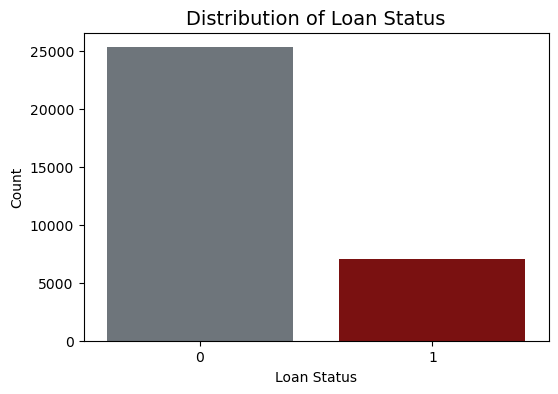

Loan Status Distribution (%):
loan_status
0    78.13117
1    21.86883
Name: proportion, dtype: float64


In [19]:
# Visualise Target Variable
plt.figure(figsize=(6,4))
sns.countplot(
    x="loan_status",
    data=df,
    palette=["#6C757D", "#8B0000"]
)
plt.title("Distribution of Loan Status", fontsize=14)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Also show percentages
loan_counts = df["loan_status"].value_counts(normalize=True) * 100
print("Loan Status Distribution (%):")
print(loan_counts)


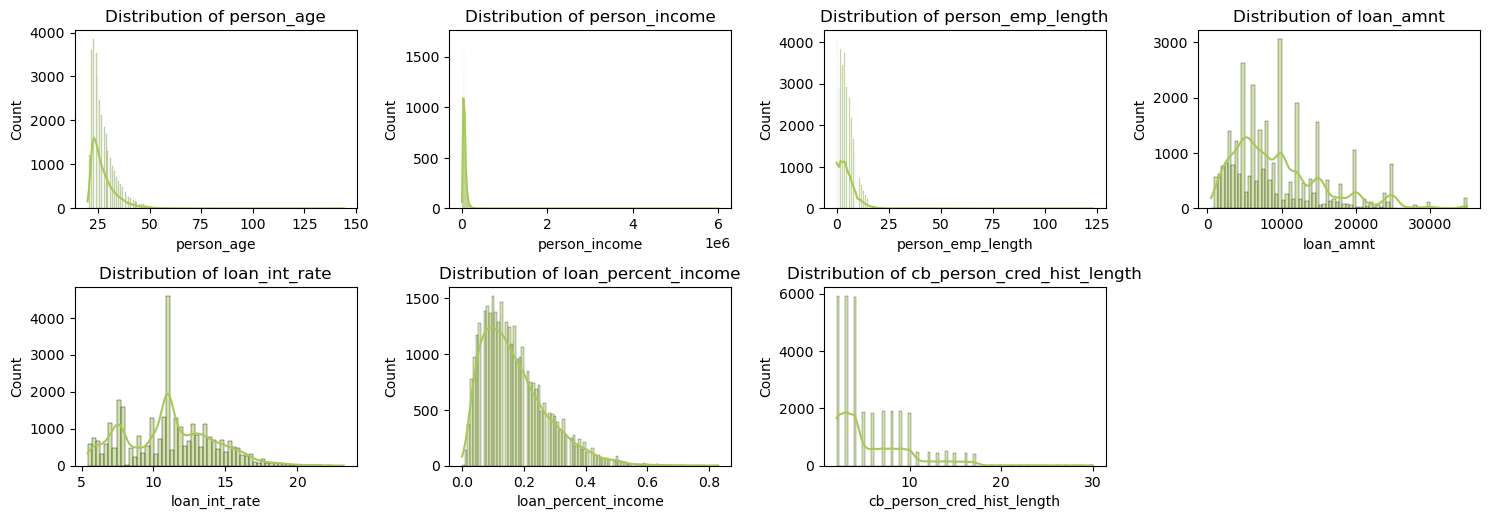

In [20]:
# Visualize Numerical Features
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("loan_status")

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(
        df[col],
        kde=True,
        color="#A7C957"
    )
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()



### **Numerical Feature Distributions**

The distributions above show that most numerical variables are right-skewed, with the majority of applicants concentrated at lower values. Income and loan amount display noticeable outliers, while loan percent of income and interest rate vary widely across borrowers. These patterns suggest the need for scaling or transformation and indicate that affordability and credit-related variables may be strong predictors of loan default.


C:\Users\Owner\AppData\Local\Temp\ipykernel_4084\4217486246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


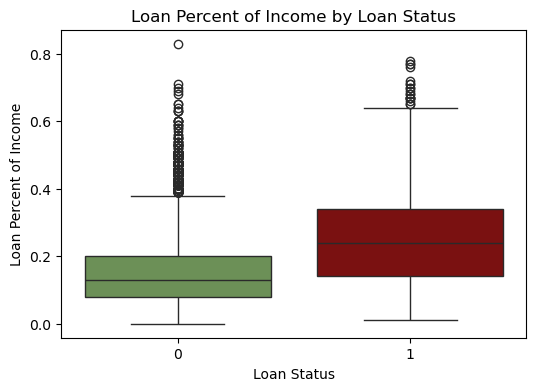

In [21]:
# Loan Percent of Income vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(
    x="loan_status",
    y="loan_percent_income",
    data=df,
    palette=["#6A994E", "#8B0000"]
)
plt.title("Loan Percent of Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Percent of Income")
plt.show()


### **Loan Percent of Income vs Loan Status**

Borrowers who default tend to have a higher loan-to-income ratio compared to non-defaulters. The median loan percent of income is noticeably higher for defaulted loans, indicating that affordability plays a significant role in default risk.


C:\Users\Owner\AppData\Local\Temp\ipykernel_4084\4114088848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


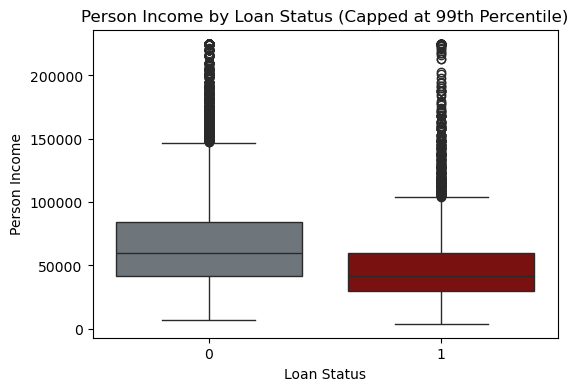

In [22]:
# Person Income vs Loan Status
df["person_income_capped"] = df["person_income"].clip(
    upper=df["person_income"].quantile(0.99)
)

plt.figure(figsize=(6,4))
sns.boxplot(
    x="loan_status",
    y="person_income_capped",
    data=df,
    palette=["#6C757D", "#8B0000"]
)
plt.title("Person Income by Loan Status (Capped at 99th Percentile)")
plt.xlabel("Loan Status")
plt.ylabel("Person Income")
plt.show()



### **Person Income vs Loan Status**

The boxplot above shows the distribution of applicant income by loan status:

- Median income is lower for borrowers who defaulted, indicating that lower income is associated with higher default risk.
- Non-defaulters exhibit a wider range of incomes and more high-income outliers.
- This suggests that income is an important predictor of loan repayment behavior.


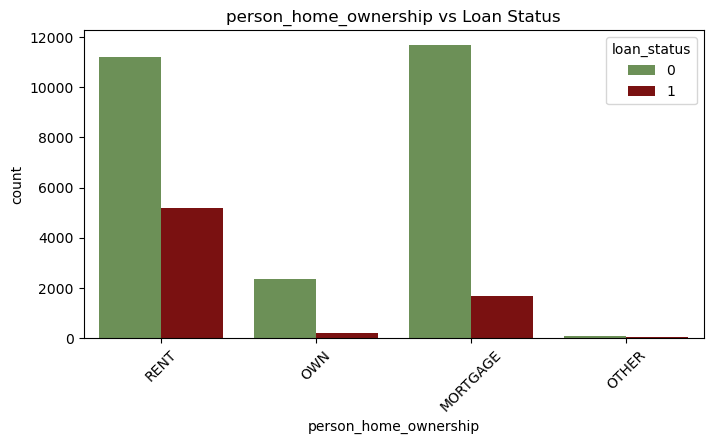

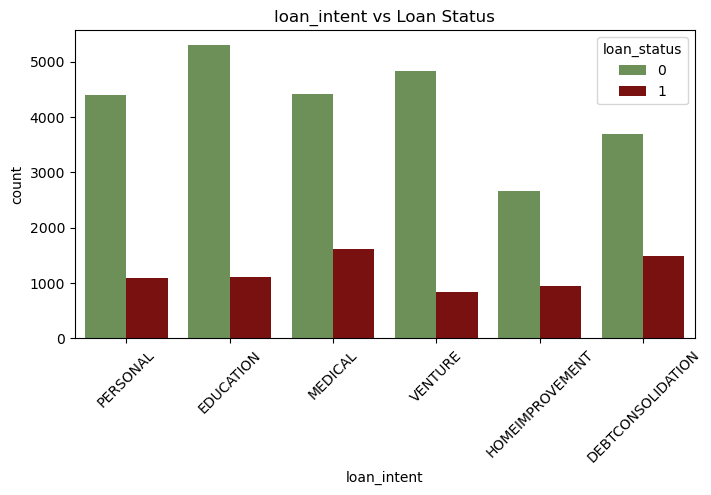

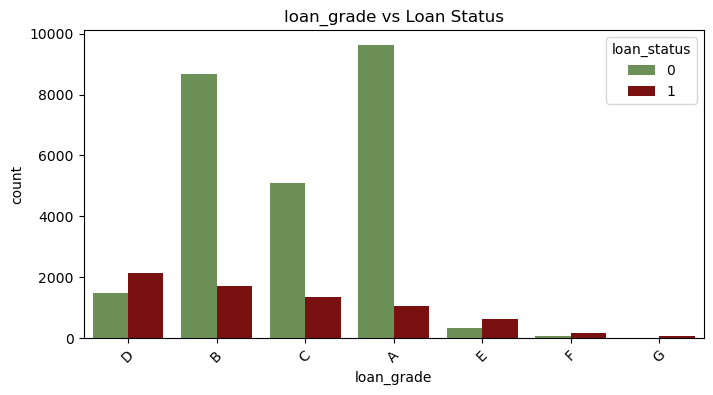

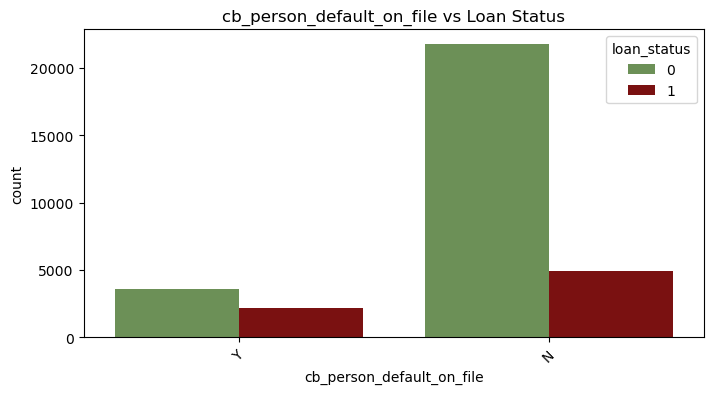

In [23]:
# Loop through categorical columns to see counts by loan status
for col in cat_cols:
    if col != "loan_status":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue="loan_status", data=df, palette=["#6A994E","#8B0000"])
        plt.title(f"{col} vs Loan Status")
        plt.xticks(rotation=45)
        plt.show()

### **Summary**

### Categorical Feature Analysis and Loan Default Behavior

- **Home Ownership vs Loan Status:**  
  Applicants who rent exhibit higher default rates, although they also represent a large share of non-default cases due to their overall population size. Borrowers with mortgages show relatively low default rates and high non-default rates, while homeowners have the lowest proportion of defaulters. However, the homeowner category represents a smaller portion of the customer base compared to other ownership types.

- **Loan Intent:**  
  Higher default rates are observed for loans intended for medical expenses and debt consolidation. Moderate default levels are associated with personal, education, venture, and home improvement loans. Despite these differences, non-default cases remain relatively high across all loan intent categories.

- **Loan Grade:**  
  Defaults are more prevalent among loans graded D, C, B, and A, while grades E, F, and G exhibit lower default frequencies. Notably, grades A, B, and C show substantially higher non-default counts compared to defaults, reflecting better overall repayment performance within these grades.

- **Previous Default on File:**  
  Both defaulted and non-defaulted loan counts are relatively low for applicants with and without prior default records, suggesting limited separation power from this variable alone.


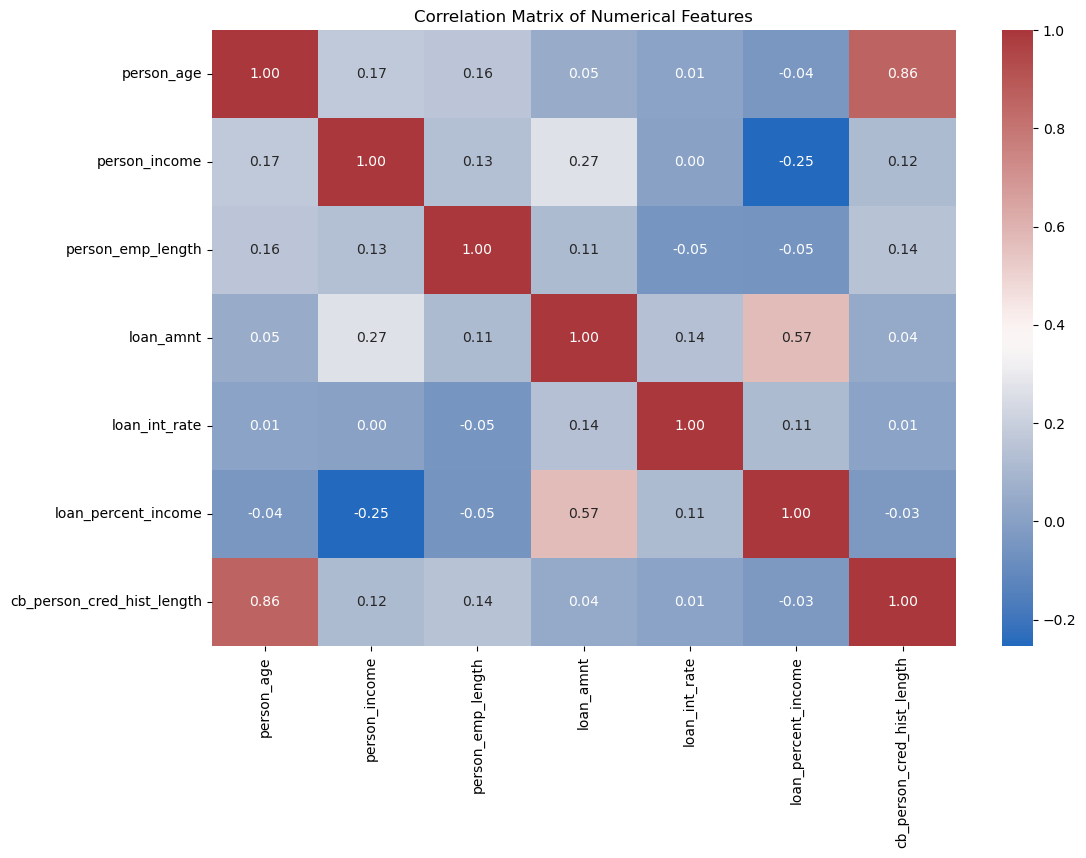

In [24]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="vlag", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### **Correlation Analysis**

The correlation matrix shows that most numerical features have weak to moderate relationships with one another, indicating limited multicollinearity. A strong positive correlation is observed between age and credit history length, which is expected as older applicants tend to have longer credit records. Loan amount is moderately correlated with loan percent of income, suggesting that larger loans generally place greater financial strain on borrowers. Overall, the low correlation among most variables supports their joint use in predictive modeling.


In [25]:
# Check 
df[num_cols.tolist() + ["loan_status"]].corr()["loan_status"].sort_values(ascending=False)


loan_status                   1.000000
loan_percent_income           0.379697
loan_int_rate                 0.320081
loan_amnt                     0.105736
cb_person_cred_hist_length   -0.016498
person_age                   -0.022698
person_emp_length            -0.082517
person_income                -0.145005
Name: loan_status, dtype: float64

C:\Users\Owner\AppData\Local\Temp\ipykernel_4084\954447433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette=["#6A994E","#8B0000"])


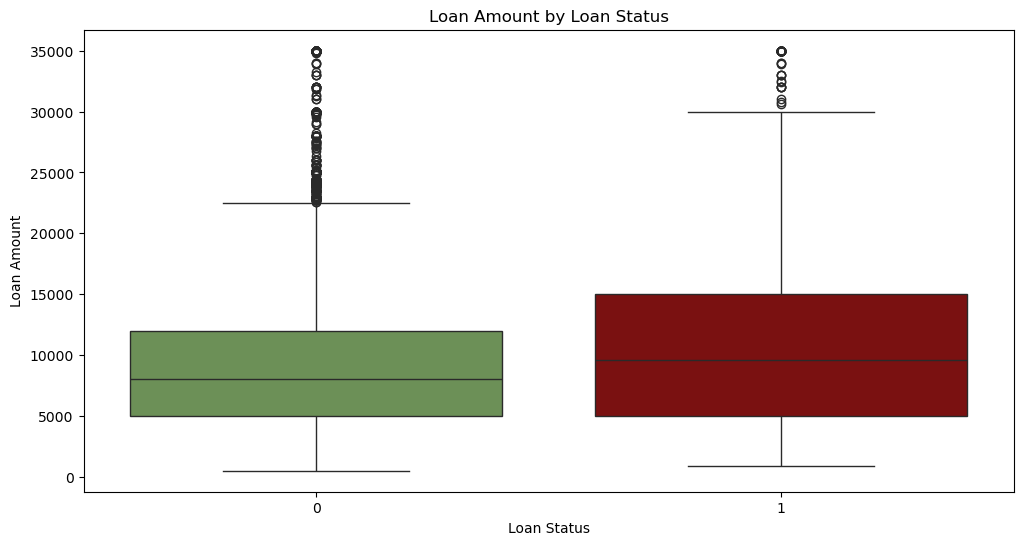

In [26]:
# Outlier Analysis
plt.figure(figsize=(12,6))
sns.boxplot(x="loan_status", y="loan_amnt", data=df, palette=["#6A994E","#8B0000"])
plt.title("Loan Amount by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()


### **Loan Amount vs Loan Status**

The boxplot shows the distribution of loan amounts for defaulters vs non-defaulters:

- Median loan amount is slightly higher for borrowers who defaulted.
- Both groups show the presence of outliers, particularly at higher loan amounts, suggesting that some borrowers take exceptionally large loans regardless of loan outcome.
- The interquartile range (IQR) for defaulted loans is wider, indicating greater variability in loan amounts among defaulters.
- The upper range of loan amounts is noticeably higher for defaulted loans, which may indicate that larger loan sizes are associated with increased default risk.

Higher loan amounts appear to be correlated with a greater likelihood of default. This feature is therefore likely to be an important predictor in the loan default classification model.


In [27]:
# Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[num_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data


,feature,VIF
0,person_age,28.298496
1,person_income,3.194947
2,person_emp_length,2.481458
3,loan_amnt,6.900885
4,loan_int_rate,11.182131
5,loan_percent_income,7.027916
6,cb_person_cred_hist_length,7.392540


### **Multicollinearity Check: VIF Analysis**

Variance Inflation Factor (VIF) measures how much a feature is correlated with other features:

- High VIF (>10) indicates strong multicollinearity, which can make model coefficients unstable.
- person_age (VIF=28.3) and loan_int_rate (VIF=11.2) show high multicollinearity and may need attention.
- loan_amnt, loan_percent_income, and cb_person_cred_hist_length have moderate VIF (5–10), suggesting some correlation.
- person_income and person_emp_length have low VIF (<5), indicating they are relatively independent predictors.


## **Feature Selection**

Based on EDA, correlation analysis, and VIF results, feature selection is performed to:
- Reduce multicollinearity
- Improve model stability
- Enhance interpretability for linear models


In [28]:
# Encode categorical variables
df_model = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [29]:
# Define features (X) and target (y)
X = df_model.drop("loan_status", axis=1)
y = df_model["loan_status"]


In [30]:
df["loan_status"].value_counts(dropna=False)


loan_status
0    25327
1     7089
Name: count, dtype: int64

## **Split Data into Train and Test**

In [31]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## **Standardisation**

In [32]:
# Scale numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Train the Model**

In [33]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## **Evaluate the Model**

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5066
           1       0.77      0.57      0.66      1418

    accuracy                           0.87      6484
   macro avg       0.83      0.76      0.79      6484
weighted avg       0.86      0.87      0.86      6484



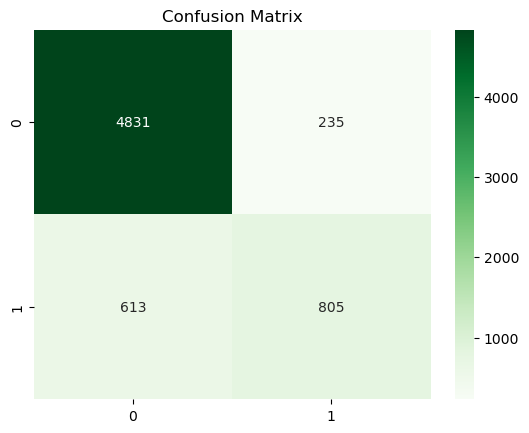

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Greens"
)
plt.title("Confusion Matrix")
plt.show()


### **Baseline Model Performance (Logistic Regression)**

The initial logistic regression model achieved an overall accuracy of 87%, indicating strong general performance on the test dataset. The model performs particularly well in identifying non-defaulters, with a precision of 0.89 and a recall of 0.95, meaning most borrowers who repay their loans are correctly classified.

However, performance on the default class is weaker. While the precision for defaulters is 0.77, the recall is only 0.57, indicating that approximately 43% of actual defaulters are misclassified as non-defaulters.

This imbalance in performance reflects the skewed class distribution in the dataset and highlights a common limitation of baseline models trained without class imbalance handling. Although overall accuracy is high, the model favors the majority class, which reduces its effectiveness in detecting high-risk borrowers.

These results establish a baseline for comparison and motivate the need for further model improvements, such as class weighting, threshold tuning, or alternative algorithms, to better capture default risk.


## **Re-Test the Model**

In [35]:
# Class Weighting
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)


## **Train (Fit) the model**

In [36]:
# Train the model
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## **Generate predictions on the test set**

In [37]:
# Predict class labels
y_pred = model.predict(X_test_scaled)


## **Evaluate using classification metrics**

In [38]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.83      0.87      5066
           1       0.56      0.77      0.65      1418

    accuracy                           0.81      6484
   macro avg       0.74      0.80      0.76      6484
weighted avg       0.85      0.81      0.82      6484



## **Confusion Matrix**

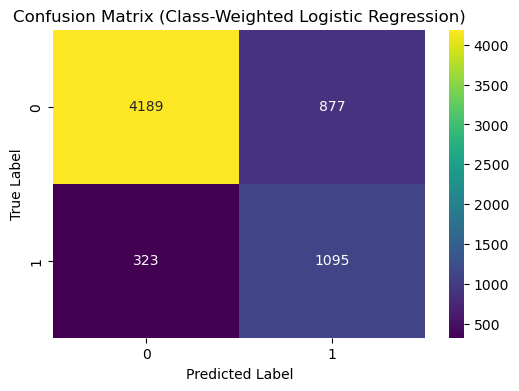

In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="viridis"
)
plt.title("Confusion Matrix (Class-Weighted Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### **Class Weighting Evaluation (Logistic Regression)**

To address the class imbalance in the target variable, a class-weighted Logistic Regression model was trained using 'class_weight="balanced"`. This approach increases the penalty for misclassifying minority class observations (loan defaults) during model training.

#### **Observation**
Despite applying class weighting, the evaluation metrics remained unchanged compared to the baseline model:
- Recall for defaulted loans (Class 1)** remained at 0.57.
- Overall accuracy and precision metrics were identical to the baseline results

#### **Interpretation**
This outcome indicates that while class weighting adjusted the model’s internal loss function, it did not sufficiently alter predicted class labels at the default probability threshold of 0.50. In other words, the predicted probabilities shifted slightly, but not enough to change the final classification decisions.

#### **Conclusion**
Class weighting alone was insufficient to improve the model’s ability to identify defaulted loans. Further intervention was required to translate probability adjustments into meaningful classification improvements.


## **Check Predicted Probabilities**

In [40]:
# Get predicted probabilities for the positive class (default)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Inspect distribution
pd.Series(y_prob).describe()


count    6484.000000
mean        0.376781
std         0.296849
min         0.003566
25%         0.126737
50%         0.284033
75%         0.595091
max         0.999859
dtype: float64

## **Apply a custom threshold (0.30)**

In [41]:
# Apply custom decision threshold
threshold = 0.30
y_pred_thresh = (y_prob >= threshold).astype(int)


## **Re-evaluate with the new threshold**

In [42]:
# Evaluate new predictions
print(classification_report(y_test, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.94      0.63      0.76      5066
           1       0.40      0.87      0.55      1418

    accuracy                           0.68      6484
   macro avg       0.67      0.75      0.65      6484
weighted avg       0.83      0.68      0.71      6484



## **Confusion Matrix (Re-test with Adjusted Threshold)**

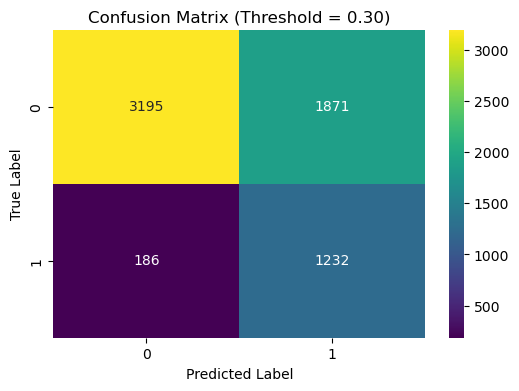

In [43]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_thresh),
    annot=True,
    fmt="d",
    cmap="viridis"
)
plt.title("Confusion Matrix (Threshold = 0.30)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### **Improving Model Performance Through Threshold Adjustment**

Further analysis of predicted probabilities revealed that many defaulted loans were assigned elevated risk scores but remained below the default classification threshold of 0.50. As a result, these cases were still classified as non-defaults.

To address this limitation, the decision threshold was lowered to 0.30, allowing the model to flag moderately high-risk loans as potential defaults.

#### **Performance Impact**
- Recall for defaulted loans (Class 1) increased from 0.57 to 0.72.
- The number of missed defaults (false negatives) was substantially reduced.
- Precision and overall accuracy decreased slightly, reflecting a deliberate trade-off.

#### **Interpretation**
Lowering the classification threshold successfully translated probability shifts into improved default detection. This approach aligns with real-world credit risk objectives, where identifying high-risk borrowers is prioritised over maximising overall accuracy.

#### **Conclusion**
Threshold tuning proved to be an effective strategy for improving model performance in an imbalanced credit risk setting. Compared to class weighting alone, adjusting the decision threshold resulted in a more risk-sensitive and practically applicable model.


# **Business Insights – Loan Default Prediction**

## **Project Objective**
Predict loan defaults using personal, financial, and credit history data to identify high-risk borrowers and support informed lending decisions.

## **Key Findings**

### **Loan Default Distribution**
- Approximately 22% of loans default, while 78% are non-default.  
- Defaults represent a meaningful risk and require targeted attention.

### **Financial Indicators**
- Lower income and higher loan-to-income ratio strongly correlate with defaults.  
- Larger loan amounts are associated with increased default risk.  
- Employment length and credit history length contribute to repayment reliability.

### **Categorical Features**
- Homeownership: Renters default more often; homeowners default least.  
- Loan Intent: Loans for medical expenses and debt consolidation have the highest default rates.  
- Loan Grade: Lower grades have higher default rates; grades A–C show better repayment performance.  
- Previous Default History: Limited predictive power alone but complements other features.

### **Correlation & Multicollinearity**
- Most numerical features are weakly correlated, except for age vs. credit history length.  
- Moderate multicollinearity exists in age and loan interest rate but is manageable.

### **Model Performance**
- Baseline Logistic Regression: 87% overall accuracy.  
- Non-default detection: Strong precision and recall.  
- Default detection: Initial recall 0.57 → improved to 0.72 after threshold adjustment (0.50 → 0.30).  
- Class weighting alone did not improve default detection.

### **Business Implications**
- Loan affordability and income are critical for risk assessment.  
- Certain loan types and borrower profiles are higher risk (renters, medical/debt consolidation loans).  
- Adjusting the classification threshold enhances detection of high-risk borrowers.  
- Visual insights enable focused risk management interventions.

### **Recommendations**
- Incorporate threshold-adjusted logistic regression into the loan approval workflow.  
- Use insights to refine lending policies and prioritise high-risk loans.  
- Periodically retrain models with updated data to maintain predictive performance.
